In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/Users/riyachanduka/Documents/Capstone_INST736/Pt_age.csv')

In [3]:
df.head()

,original_sheet,record_number,sheet_id,sid_number,gender,race,dob,computed_age,court_date,intake_date,...,court_original_field,judge_name_original_field,court_sentencing_original_field,charge_original_field,violation_reason_or_dont_use,judges_decision_or_dont_use,judge_name_or_dont_use,case_number_or_dont_use,charge_open_refine_field_no_use,age_range
0,active_pt,1,active_pt_1,4304458,M,B,11/11/99,18.0,1/24/19,2017-11-30T00:00:00Z,...,NaN,Chesser,no information provided,Robbery,NaN,Level 4,Chesser,D043CR17001009,robbery,16 - 35
1,active_pt,2,active_pt_2,3168416,M,W,2/22/94,24.0,3/11/19,2018-07-23T00:00:00Z,...,NaN,Chesser,no information provided,Burlary 1st,NaN,Level 2,Chesser,C18CR18280,burglary 1st,16 - 35
2,active_pt,3,active_pt_3,3775956,M,W,3/15/81,37.0,1/15/19,2018-07-27T00:00:00Z,...,NaN,"Riddle, Mr",no information provided,Child abuse 2,NaN,Level 3,Robert Riddle,D043CR181093,child abuse 2nd,36 - 55
3,active_pt,4,active_pt_4,1458033,M,B,12/8/74,43.0,11/27/18,2018-07-16T00:00:00Z,...,NaN,Stamm,no information provided,Non-support,NaN,Level 2,Stamm,C18CR17107,non-support,36 - 55
4,active_pt,5,active_pt_5,1130717,M,B,1/26/70,48.0,2/25/19,2018-09-10T00:00:00Z,...,NaN,Stamm,no information provided,VOP (CDS poss not mari),NaN,Level 3,Stamm,18K1679,vop - cds possession not marijuana,56 - 75


In [4]:
df.shape

(3049, 65)

In [65]:
df.columns

Index(['original_sheet', 'record_number', 'sheet_id', 'sid_number', 'gender',
       'race', 'dob', 'computed_age', 'court_date', 'intake_date', 'charge_1',
       'Charge_Level', 'charge_2', 'charge_3', 'charge_4', 'charge_5',
       'case_number_1', 'case_number_2', 'case_number_3', 'case_number_4',
       'case_number_5', 'case_number_6', 'case_number_7', 'case_number_8',
       'case_number_9', 'risk_assess_level', 'points', 'override_notes',
       'court_type', 'judge_name_1', 'judge_name_2', 'judge_decision',
       'bond_amount', 'bond_percentage', 'bond_y_n', 'additional_comment',
       'address', 'phone_number', 'job_information', 'treatment_notes',
       'health_ins', 'release_date', 'court_sentence_notes', 'violation_date',
       'violation_reason_1', 'violation_reason_2', 'violation_reason_3',
       'risk_assessment_level_original_field',
       'override_details_or_notes_original_field',
       'judges_decision_original_field', 'additional_comments_original_field',
  

In [66]:
new_df = df.filter(['Charge_Level','race','risk_assess_level'], axis=1)

In [67]:
new_df

,Charge_Level,race,risk_assess_level
0,High,B,Detain
1,High,W,Detain
2,High,W,Detain
3,Low,B,Level 2
4,Moderate,B,Level 3
5,High,W,NaN
6,High,W,Level 3
7,High,B,Sent by judge
8,High,B,No recommendation
9,Moderate,B,Level 1


In [68]:
group_charge_level=new_df.groupby('Charge_Level').race.value_counts().sort_index()

In [69]:
group_charge_level


Charge_Level      race
High              A         5
                  B       755
                  H         9
                  OT        1
                  W       662
Highest           A         1
                  B        95
                  W       131
Low               B       104
                  H         3
                  W       110
Moderate          B       439
                  H        12
                  W       705
no local charges  B         1
                  W         1
Name: race, dtype: int64

In [70]:
group_charge_level.unstack()

race,A,B,H,OT,W
Charge_Level,,,,,
High,5.0,755.0,9.0,1.0,662.0
Highest,1.0,95.0,NaN,NaN,131.0
Low,NaN,104.0,3.0,NaN,110.0
Moderate,NaN,439.0,12.0,NaN,705.0
no local charges,NaN,1.0,NaN,NaN,1.0


In [71]:
df_race=group_charge_level.unstack()

In [72]:
final_df = df_race.filter(['B','W'], axis=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c90d3c8>,
      dtype=object)

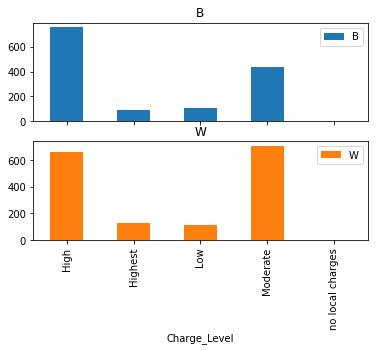

In [73]:
final_df.plot(kind='bar', subplots=True)

In [74]:
pivot_risk = new_df.pivot_table(index='Charge_Level', columns='race',values='risk_assess_level',aggfunc='first')

In [75]:
pivot_risk

race,A,B,H,OT,W
Charge_Level,,,,,
High,Detain,Detain,Detain,No recommendation,Detain
Highest,Detain,Detain,None,None,Detain
Low,None,Level 2,Level 1,None,Detain
Moderate,None,Level 3,Detain,None,Level 2
no local charges,None,NaN,None,None,NaN


In [76]:
pivot_risk.filter(['B','W'], axis=1)

race,B,W
Charge_Level,,
High,Detain,Detain
Highest,Detain,Detain
Low,Level 2,Detain
Moderate,Level 3,Level 2
no local charges,NaN,NaN


In [77]:
pivot_table = new_df.pivot_table(index=['Charge_Level'],columns=['race'],
                             values=['risk_assess_level'],
                             aggfunc=lambda x: ' '.join(str(v) for v in x))

In [78]:
pivot_table

risk_assess_level  \
race                                                              A   
Charge_Level                                                          
High              Detain Detain Detain Detain Release without pr...   
Highest                                                      Detain   
Low                                                            None   
Moderate                                                       None   
no local charges                                               None   

                                                                     \
race                                                              B   
Charge_Level                                                          
High              Detain Sent by judge No recommendation Detain ...   
Highest           Detain Detain Detain Detain Detain Detain Deta...   
Low               Level 2 Detain Release without pretrial superv...   
Moderate          Level 3 Level 1 Level 1 Release without pretri...   
no local charges                                                nan   

                                                                     \
race                                                              H   
Charge_Level                                                          
High              Detain Detain Detain Detain Detain Detain Deta...   
Highest                                                        None   
Low                               Level 1 No recommendation Level 2   
Moderate          Detain Detain Detain Detain Detain No recommen...   
no local charges                                               None   

                                     \
race                             OT   
Charge_Level                          
High              No recommendation   
Highest                        None   
Low                            None   
Moderate                       None   
no local charges               None   

                                                                     
race                                                              W  
Charge_Level                                                         
High              Detain Detain nan Level 3 Sent by judge Detain...  
Highest           Detain Detain Detain Detain Detain Detain Deta...  
Low               Detain Detain Detain Detain Detain Detain Deta...  
Moderate          Level 2 Detain Level 2 Level 2 Detain Sent by ...  
no local charges                                                nan

In [79]:
new_df.columns

Index(['Charge_Level', 'race', 'risk_assess_level'], dtype='object')

In [80]:
df_Detained = new_df[new_df.risk_assess_level == 'Detain']

In [81]:
df_Detained

,Charge_Level,race,risk_assess_level
0,High,B,Detain
1,High,W,Detain
2,High,W,Detain
11,Low,B,Detain
13,High,NaN,Detain
14,High,B,Detain
15,High,W,Detain
17,High,B,Detain
20,High,B,Detain
21,Moderate,W,Detain


In [82]:
l= ['B','W']
df_Detained=df_Detained[df_Detained['race'].isin(l)]

In [83]:
Detained_charge_level=df_Detained.groupby('Charge_Level').race.value_counts().sort_index()

In [84]:
Detained_charge_level

Charge_Level  race
High          B       616
              W       490
Highest       B        87
              W       126
Low           B        55
              W        64
Moderate      B       280
              W       437
Name: race, dtype: int64

In [85]:
Detained_charge_level.unstack()

race,B,W
Charge_Level,,
High,616,490
Highest,87,126
Low,55,64
Moderate,280,437


In [86]:
df_Detained_charge_level=Detained_charge_level.unstack()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11cb13e80>,
      dtype=object)

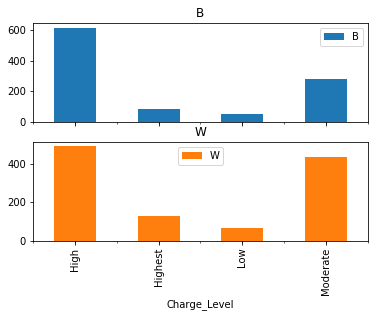

In [87]:
Detained_charge_level.unstack().plot(kind='bar', subplots=True)

## Points

## By Race

In [88]:
df_points=df.groupby('race', as_index=False)[['points']].mean()

In [89]:
df_points=df_points.dropna()

In [90]:
df_points

,race,points
0,A,12.000000
1,B,12.295918
2,H,6.500000
3,OT,5.000000
4,W,11.798973


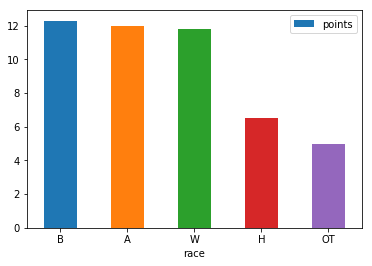

In [91]:
df_points.sort_values('points', ascending=False).plot(kind='bar',x='race',y='points',rot=0)

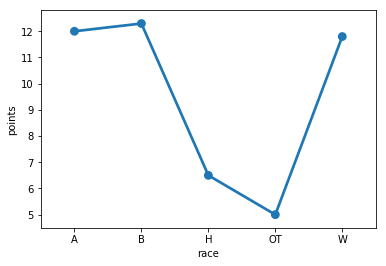

In [92]:
import seaborn as sns
sns.pointplot(x="race", y="points", data=df_points);

## By Gender

In [93]:
df_points_gender=df.groupby('gender', as_index=False)[['points']].mean()

In [94]:
df_points_gender=df_points_gender.dropna()

In [95]:
df_points_gender

,gender,points
0,F,10.915385
1,M,12.272790


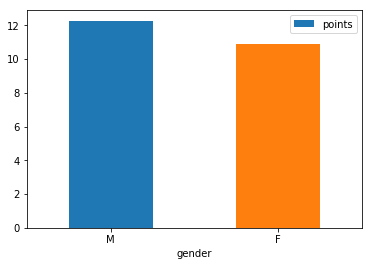

In [96]:
df_points_gender.sort_values('points', ascending=False).plot(kind='bar',x='gender',y='points',rot=0)

## By Age group

In [97]:
df_points_age=new_df_age.groupby('age_range', as_index=False)[['points']].mean()

In [98]:
df_points_age=df_points_age.dropna()

In [99]:
df_points_age

,age_range,points
0,16 - 35,12.249068
1,36 - 55,12.291580
2,56 - 75,10.635036
3,76 - 95,7.333333


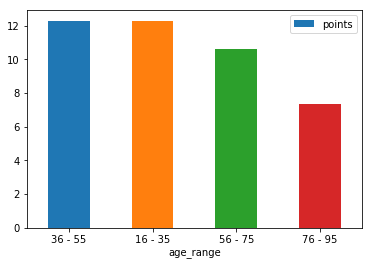

In [102]:
df_points_age.sort_values('points', ascending=False).plot(kind='bar',x='age_range',y='points',rot=0)